### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 4</span>


Questa è la prima esercitazione di una serie che si concentra sulla sumulazione, con tecniche Monte Carlo e di Molecular Dynamics, di un sistema di N particelle in 3 dimensioni, debolmente interagenti tramite potenziale di Lennard-Jones $$V_{LJ}(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]$$ che tuttavia si preferisce esprimere in unità ridotte, indicate con l'asterico: lunghezze espresse in unità di $\sigma$, energie in unità di $\epsilon$ e masse in unità di $m$. Si ottiene quindi $$V^{\star}(r^{\star})= 4 [(\frac{1}{r^{\star}})^{12}-(\frac{1}{r^{\star}})^{6}] $$
Con questa parametrizzazione  i valori numerici sono nell'ordine delle unità, cosa che rende più sicuro il calcolo. Inoltre, con uno stesso valore di grandezze ridotte, si possono rappresentare allo stesso tempo sistemi diversi in unità assolute; questo fatto è noto come legge degli stati corrispondenti. 

### Esercizio 4.1

Come prima cosa, si è implementato il calcolo della distribuzione di Maxwell-Boltzmann $p(v^*,T^*)$ $$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$
  
Anche in questo caso è stata usata la tecnica del data blocking, con 20 blocchi da 2000 passi ciascuno, per un sistema di 108 particelle a tempratura iniziale $T^{\star}=2$ (gli stessi dati sono stati usati negli esercizi 4.2 e 4.3). Per verificare la correttezza del codice aggiunto, si stampano gli istogrammi normalizzati delle velocità in [0, $v_{max}$] per ogni blocco. Poichè le velocità iniziali sono già inizializzate secondo una distribuzione gaussiana, gli istogrammi non variano molto progressivamente e il fit con la maxwelliana teorica è efficace. 

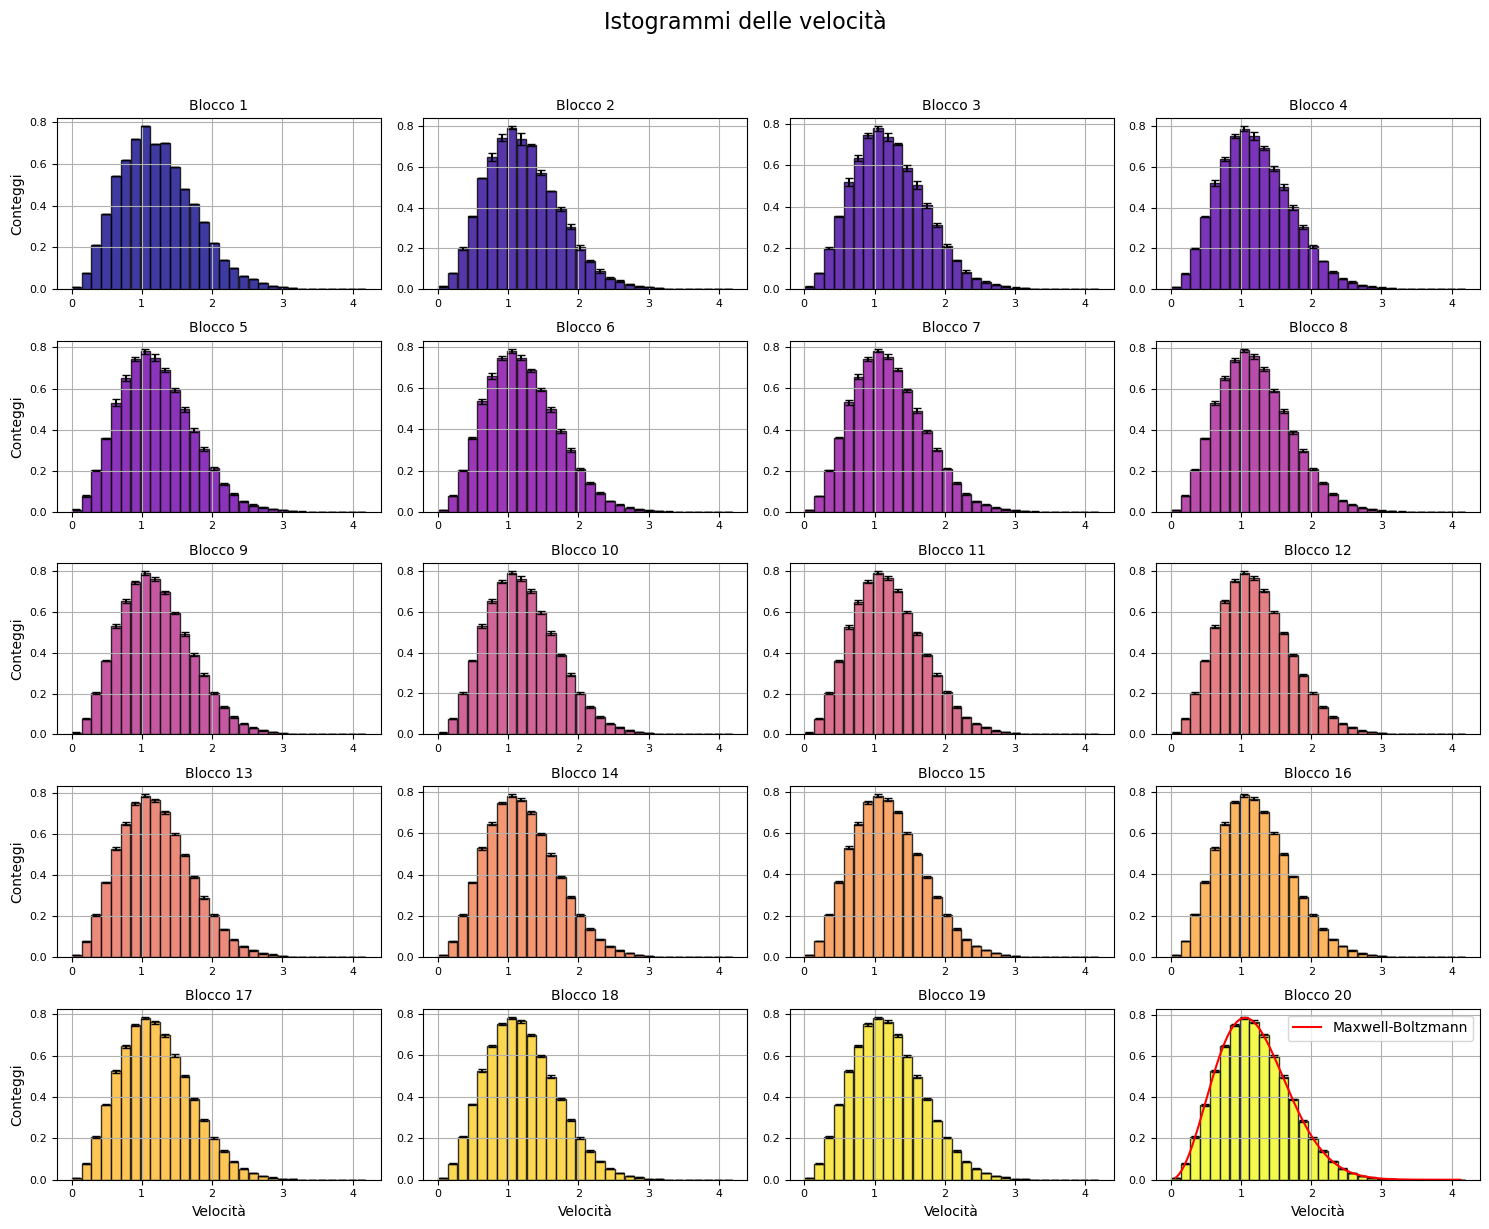

In [36]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("esercizio4.1/OUTPUT/pofv.dat")

x = data[:, 0]   # Velocità
y = data[:, 1]   # Conteggi già calcolati
err = data[:, 2] # Errori

def maxwell_boltzmann(x):
    return 1/(2*np.pi*0.56)**(3.0/2.0) * 4 * np.pi * x**2 * np.exp(-x**2 / (2 * 0.56))

# Parametri
colors = plt.cm.plasma(np.linspace(0, 1, 20))  # 20 colori distinti
block_size = 30
n_blocks = 20

# Crea figura con 20 subplot (5 righe x 4 colonne)
fig, axes = plt.subplots(5, 4,figsize=(15, 12))
axes = axes.flatten()  # Facilita l'indicizzazione

for i in range(n_blocks):
    start_idx = i * block_size
    end_idx = (i + 1) * block_size
    
    # Istogramma manuale usando plt.bar()
    axes[i].bar( x[start_idx:end_idx], y[start_idx:end_idx], yerr=err[start_idx:end_idx],  # Aggiunta degli errori
    color=colors[i], alpha=0.8, width=(x[end_idx-1] - x[start_idx]) / block_size,
    capsize=3, edgecolor='black')
    
    axes[i].set_title(f'Blocco {i+1}', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(labelsize=8)

    # Etichette solo sui margini
    if i % 4 == 0:
        axes[i].set_ylabel('Conteggi')
    if i >= 16:
        axes[i].set_xlabel('Velocità')

    if i == 19:
        v_fit = np.linspace(min(x), max(x), 300)
        axes[i].plot(v_fit, maxwell_boltzmann(v_fit), 'r-', label='Maxwell-Boltzmann')
        axes[i].legend()

# Layout e titolo generale
plt.tight_layout()
plt.legend()
plt.suptitle('Istogrammi delle velocità', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.93)

plt.show()


### Esercizio 4.2
Si è poi svolta una simulazione di Molecular Dynamics secondo modello di Lennard-Jones, di un sistema in fase gassosa, $\rho^\star = 0.05$, $T^\star \sim  2.0$ (e raggio di cutt-off del potenziale $r_c=5.0$), che corrisponde, ad esempio, all'Argon con parametri $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

La configurazione iniziale a bassa entropia, si realizza imponendo che il sistema parta da una configurazione spaziale fcc, che occupi un quarto del volume disponibile, e che la distribuzione iniziale delle velocità sia una delta, $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$. 

Si vuole mostrare che facendo evolvere il sistema, la distribuzione delle velocità tende a quella di Maxwell-Boltzmann.

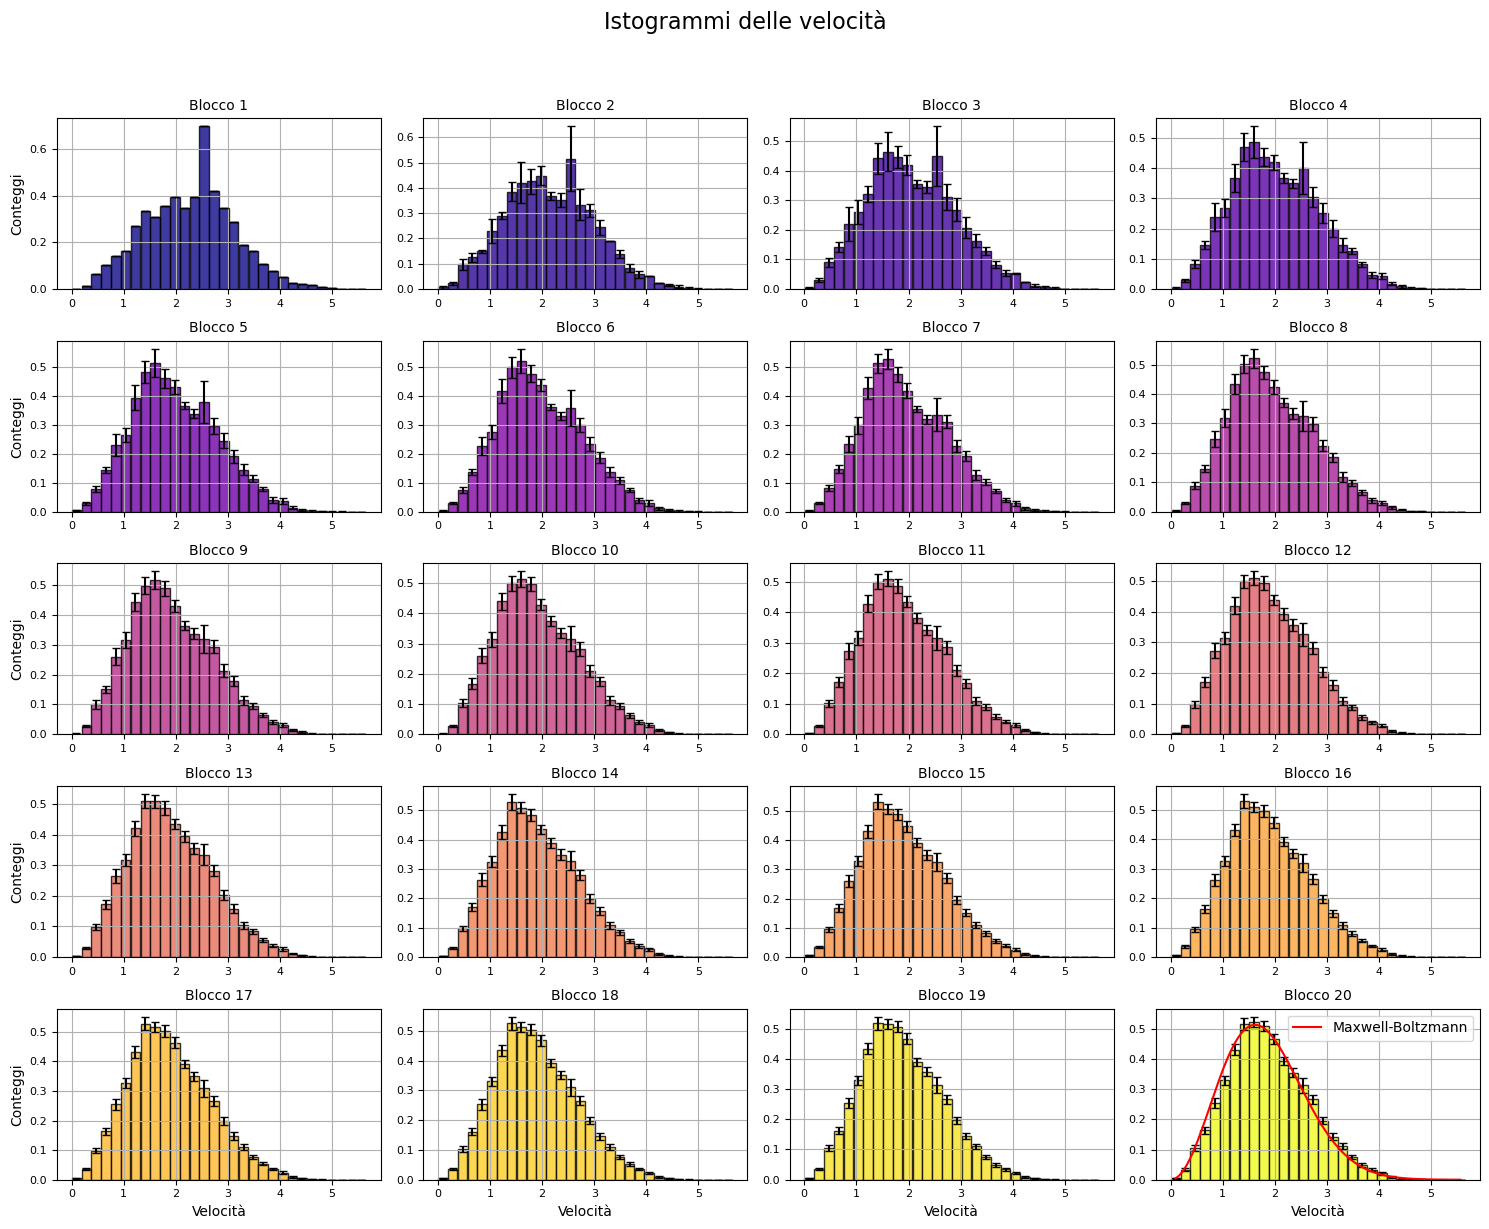

In [46]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("esercizio4.2/OUTPUT/pofv.dat")

x = data[:, 0]   # Velocità
y = data[:, 1]   # Conteggi già calcolati
err = data[:, 2] # Errori

def maxwell_boltzmann(x):
    return 1/(2*np.pi*1.31)**(3.0/2.0) * 4 * np.pi * x**2 * np.exp(-x**2 / (2 * 1.31))

# Parametri
colors = plt.cm.plasma(np.linspace(0, 1, 20))  # 20 colori distinti
block_size = 30
n_blocks = 20

# Crea figura con 20 subplot (5 righe x 4 colonne)
fig, axes = plt.subplots(5, 4,figsize=(15, 12))
axes = axes.flatten()  # Facilita l'indicizzazione

for i in range(n_blocks):
    start_idx = i * block_size
    end_idx = (i + 1) * block_size
    
    axes[i].bar( x[start_idx:end_idx], y[start_idx:end_idx], yerr=err[start_idx:end_idx],  # Aggiunta degli errori
    color=colors[i], alpha=0.8, width=(x[end_idx-1] - x[start_idx]) / block_size,
    capsize=3, edgecolor='black'
)
    
    axes[i].set_title(f'Blocco {i+1}', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(labelsize=8)
    

    # Etichette solo sui margini
    if i % 4 == 0:
        axes[i].set_ylabel('Conteggi')
    if i >= 16:
        axes[i].set_xlabel('Velocità')

    if i == 19:
        v_fit = np.linspace(min(x), max(x), 300)
        axes[i].plot(v_fit, maxwell_boltzmann(v_fit), 'r-', label='Maxwell-Boltzmann')
        axes[i].legend()


# Layout e titolo generale
plt.tight_layout()
plt.legend()
plt.suptitle('Istogrammi delle velocità', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.93)

plt.show()


Dagli istogrammi prodotti si osserva l'evoluzione della distribuzione di velocità che da una delta tende alla Maxwell-Boltmann, ad indicare l'aumento della randomicità e la dispersione delle velocità delle particelle. Questo è segno che il sistema si è evoluto spontanemente verso uno stato ad entropia maggiore, in accordo con il secondo principio della termodinamica. 

### Esercizio 4.3
Infine, si è voluto testare il comportamento del sistema sotto inversione temporale, a partire dalla configurazione d'equilibrio raggiunta nel 4.2. Per invertire il tempo si è semplicemente usata la funzione restart, già implementate nel codice, con gli accorgimenti di impostare come nuova temperatura iniziale quella finale dell'esercizio precedente, $T^{\star}=1.31$, passare in in input le posizioni iniziali e quelle precedenti ($r(t-\delta t)$) e di rimettere una distribuzione randomica delle velocità iniziali.

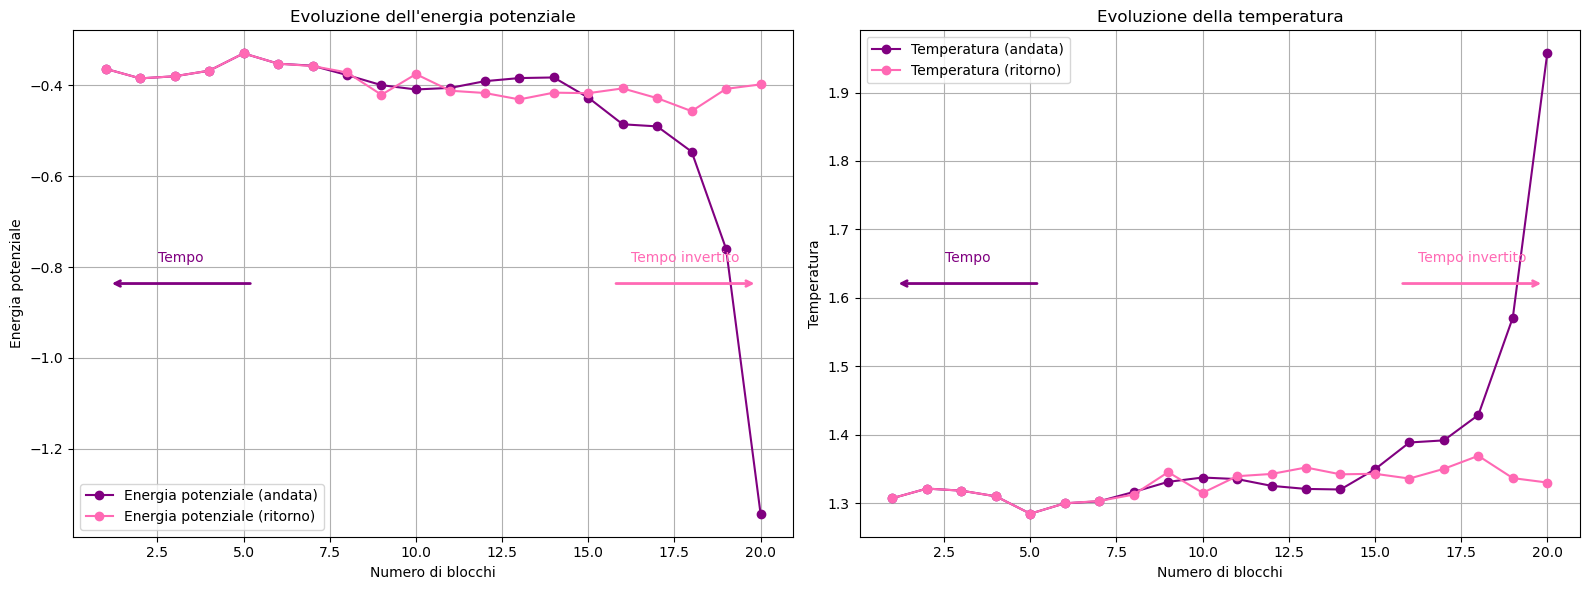

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    with open(filename) as f:
        lines = f.read().strip().split('\n')[1:]  # Skip header
    x, y = [], []
    for line in lines:
        parts = line.split()
        if len(parts) >= 2:
            x.append(float(parts[0]))
            y.append(float(parts[1]))
    return np.array(x), np.array(y)

files = [
    "simulazioni_eseguite/04.2/potential_energy.dat",
    "simulazioni_eseguite/04.3/potential_energy.dat",
    "simulazioni_eseguite/04.2/temperature.dat",
    "simulazioni_eseguite/04.3/temperature.dat"
]

labels = [
    "Energia potenziale (andata)",
    "Energia potenziale (ritorno)",
    "Temperatura (andata)",
    "Temperatura (ritorno)"
]

colors = ['purple', 'hotpink', 'purple', 'hotpink']
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot energia potenziale
for i in range(2):
    x, y = read_data(files[i])
    if i == 0:  # Inverti tempo e y per Clockwise
        x = x[::-1]

    axs[0].plot(x, y, label=labels[i], marker='o', color=colors[i])

axs[0].set_title("Evoluzione dell'energia potenziale")
axs[0].set_xlabel("Numero di blocchi")
axs[0].set_ylabel("Energia potenziale")
axs[0].legend()
axs[0].grid(True)

# Plot temperatura
for i in range(2, 4):
    x, y = read_data(files[i])
    if i == 2:  # Inverti tempo e y per Clockwise
        x = x[::-1]

    axs[1].plot(x, y, label=labels[i], marker='o', color=colors[i])

axs[1].set_title("Evoluzione della temperatura")
axs[1].set_xlabel("Numero di blocchi")
axs[1].set_ylabel("Temperatura")
axs[1].legend()
axs[1].grid(True)

# Aggiunta delle frecce esplicative
arrow_props = dict(facecolor='black', arrowstyle='->', linewidth=1.5)

# Riquadro per l'energia potenziale
axs[0].annotate('', xy=(0.05, 0.50), xycoords='axes fraction',
                xytext=(0.25, 0.50), arrowprops=dict(arrowstyle='->', color='purple', lw=2))
axs[0].text(0.15, 0.55, 'Tempo', ha='center', va='center', transform=axs[0].transAxes, color='purple')

axs[0].annotate('', xy=(0.95, 0.50), xycoords='axes fraction',
                xytext=(0.75, 0.50), arrowprops=dict(arrowstyle='->', color='hotpink', lw=2))
axs[0].text(0.85, 0.55, 'Tempo invertito', ha='center', va='center', transform=axs[0].transAxes, color='hotpink')

# Riquadro per la temperatura
axs[1].annotate('', xy=(0.05, 0.50), xycoords='axes fraction',
                xytext=(0.25, 0.50), arrowprops=dict(arrowstyle='->', color='purple', lw=2))
axs[1].text(0.15, 0.55, 'Tempo', ha='center', va='center', transform=axs[1].transAxes, color='purple')

axs[1].annotate('', xy=(0.95, 0.50), xycoords='axes fraction',
                xytext=(0.75, 0.50), arrowprops=dict(arrowstyle='->', color='hotpink', lw=2))
axs[1].text(0.85, 0.55, 'Tempo invertito', ha='center', va='center', transform=axs[1].transAxes, color='hotpink')

fig.tight_layout()
plt.show()



I grafici mostrano l'andamento dell'energia potenziale e della temperatura, in funzione del numero di blocchi, sia dell'andata, quindi con i valori ottenuti nell'esercizio precedente, sia del ritorno, cioè col tempo invertito. Si osserva che, dopo un'iniziale congruenza tra gli andamenti, il sistema non riesce a tornare nello stesso identico stato iniziale. Questo risultato è in accordo con il secondo principio della termodinamica che ha come conseguenza l'irreversibilità di una trasformazione spontanea. 